# DBSCAN 

Hands on! Another notebook??? Yes. More toy data? Yes!. Can you guess why? In real life, many datasets are not linearly separable, neither have clear shapes. Datasets for DBSCAN are hard to find, but it usually works great for spacial data. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
df0 = pd.read_csv("0",header=None,delim_whitespace=True)
df33 = pd.read_csv("33",header=None,delim_whitespace=True)
df91 = pd.read_csv("91",header=None,delim_whitespace=True)

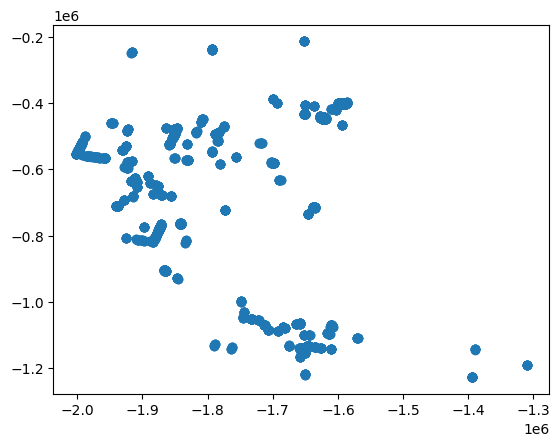

In [4]:
plt.scatter(df0[0], df0[1])
plt.show()

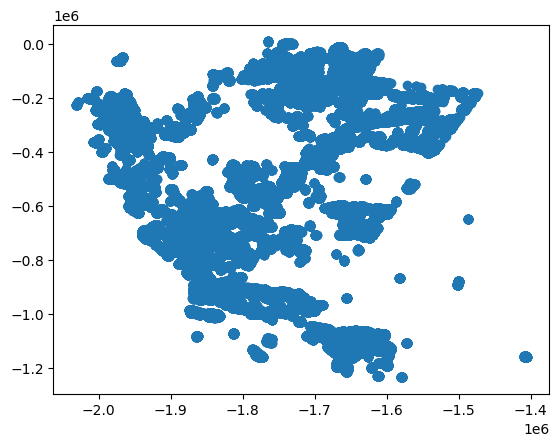

In [5]:
plt.scatter(df33[0], df33[1])
plt.show()

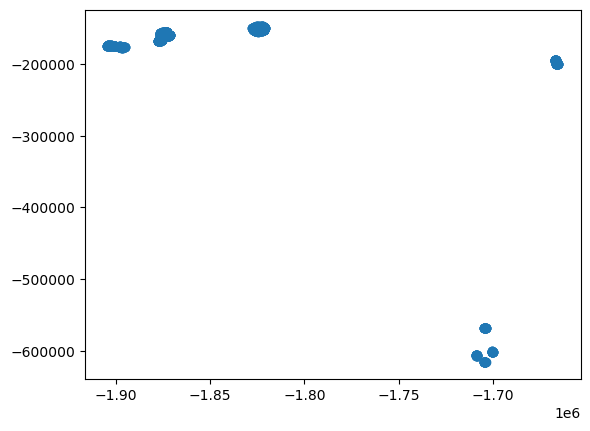

In [6]:
plt.scatter(df91[0], df91[1])
plt.show()

In [7]:
#Check the data, is there a need for any preprocessing?
X0 = df0.to_numpy()
X33 = df33.to_numpy()
X91= df91.to_numpy()

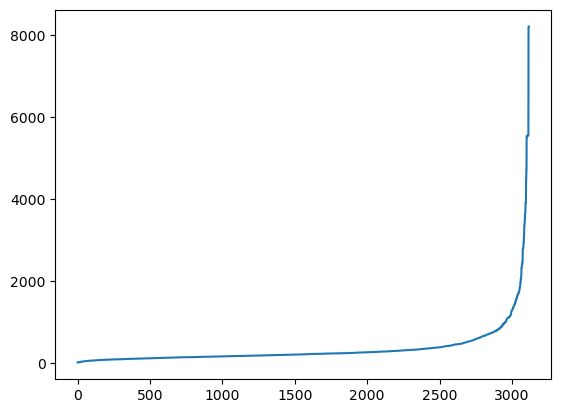

In [8]:
# The challenge here is how to chose the two values for DBSCAN. Remember that it will find the number of clusters, 
# but we need to specify how many points should be in the neighbourhood of eps radius.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Define the range of eps values to test
eps_range = np.linspace(5, 50, 50)

# Fit nearest neighbors model to the data
nn_model = NearestNeighbors(n_neighbors=5)
nn_model.fit(X0)

# Calculate distances to the k-th nearest neighbor for each point
distances, indices = nn_model.kneighbors(X0)
distances = np.sort(distances[:,4])

# Plot the sorted distances
plt.plot(distances)



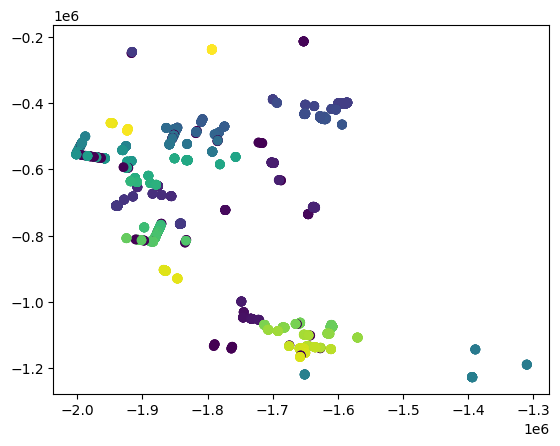

In [9]:
# Find the knee point in the plot
knee = np.diff(distances, 1).argmax()
eps = 1000

# Run DBSCAN with selected eps value and min_samples=5
dbscan = DBSCAN(eps=eps, min_samples=5)
clusters = dbscan.fit_predict(X0)

# Plot the resulting clusters
plt.scatter(X0[:, 0], X0[:, 1], c=clusters)
plt.show()

In [10]:
# Find the knee point in the plot
knee = np.diff(distances, 1).argmax()
eps = 1000

# Run DBSCAN with selected eps value and min_samples=5
dbscan = DBSCAN(eps=eps, min_samples=5)
clusters = dbscan.fit_predict(X0)

# Get the cluster labels
labels = clusters

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X0, labels):.3f}")


Estimated number of clusters: 127
Estimated number of noise points: 118
Silhouette Coefficient: 0.648


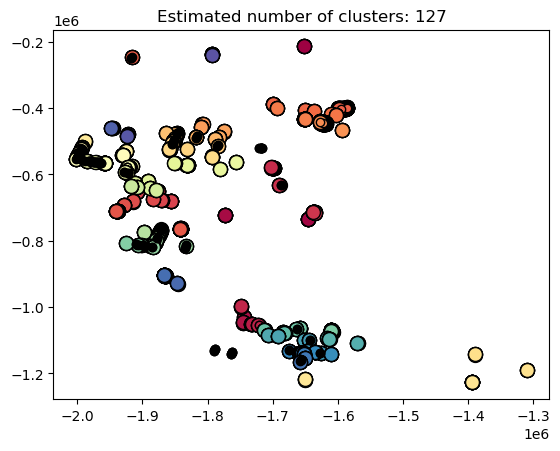

In [11]:
# Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Use black color for noise points
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X0[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    # Plot non-core samples
    xy = X0[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()


### X33

Nice! Now find the best $\epsilon$ and min_samples for this dataset.  
After that, repeat the process using the 91 and 33 files.

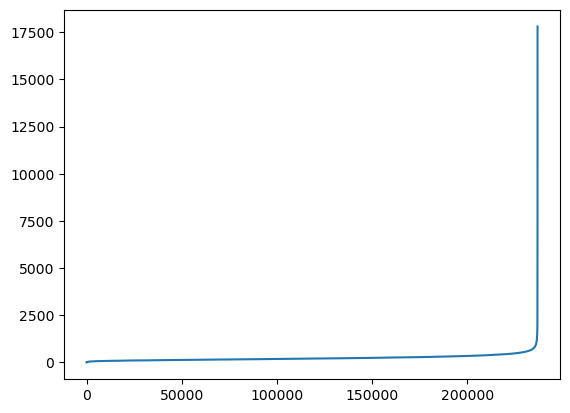

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Define the range of eps values to test
eps_range = np.linspace(5, 50, 50)

# Fit nearest neighbors model to the data
nn_model = NearestNeighbors(n_neighbors=5)
nn_model.fit(X33)

# Calculate distances to the k-th nearest neighbor for each point
distances, indices = nn_model.kneighbors(X33)
distances = np.sort(distances[:,4])

# Plot the sorted distances
plt.plot(distances)


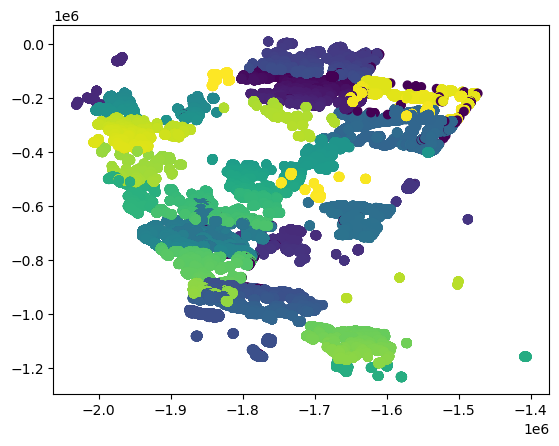

In [14]:
# Find the knee point in the plot
knee = np.diff(distances, 1).argmax()
eps = 1000

# Run DBSCAN with selected eps value and min_samples=5
dbscan = DBSCAN(eps=eps, min_samples=5)
clusters = dbscan.fit_predict(X33)

# Plot the resulting clusters
plt.scatter(X33[:, 0], X33[:, 1], c=clusters)
plt.show()